In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [2]:
path                                  =  './models/test_shuffle/first_data/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.0025075
time_dim     : 16
encoder      : [765, 373]
decoder      : [466]
vector       : 765
AUC_v        : 0.7662710674157305


In [3]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## plus min sigmoid

In [20]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=544239, Thu Jun  7 17:08:37 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -8.400173620135778e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:58.0
    2     42 -8.435495441171884e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:08.6
    3     63 -8.482071381787559e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:17.0
    4     84 -8.516275588177198e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:26.4
    5    105 -8.566386310000311e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:37.1
    6    126 -8.601396238576937e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:45.3
    7    147 -8.655613544449874e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:53.6
    8    168 -8.652468628816783e-01 1.0e+00 3.82e-01  4e-01  4e-01 2:01.9
    9    189 -8.697874972709410e-01 1.0e+00 3.79e-01  4e-01  4e-01 2:09.7
   10    210 -8.716952394814268e-01 1.0e+00 3.76e-01  4e-01  4e-01 2:19.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -8.785828

  100   2100 -9.543051555823552e-01 1.2e+00 4.53e-01  5e-01  5e-01 23:19.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.550329046544751e-01 1.2e+00 4.53e-01  5e-01  5e-01 24:24.8
  102   2142 -9.541154210028383e-01 1.2e+00 4.54e-01  5e-01  5e-01 24:33.8
  103   2163 -9.551862517803861e-01 1.2e+00 4.55e-01  5e-01  5e-01 24:43.4
  104   2184 -9.568340836079718e-01 1.2e+00 4.56e-01  5e-01  5e-01 24:53.1
  105   2205 -9.555735182509070e-01 1.2e+00 4.56e-01  5e-01  5e-01 25:02.9
  106   2226 -9.553941800867062e-01 1.2e+00 4.57e-01  5e-01  5e-01 25:12.4
  107   2247 -9.550562965889360e-01 1.2e+00 4.57e-01  5e-01  5e-01 25:22.2
  108   2268 -9.561817085468929e-01 1.2e+00 4.58e-01  5e-01  5e-01 25:31.7
  109   2289 -9.556566895734351e-01 1.2e+00 4.58e-01  5e-01  5e-01 25:40.2
  110   2310 -9.560569515631010e-01 1.2e+00 4.59e-01  5e-01  5e-01 25:49.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.562830735962239

In [21]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

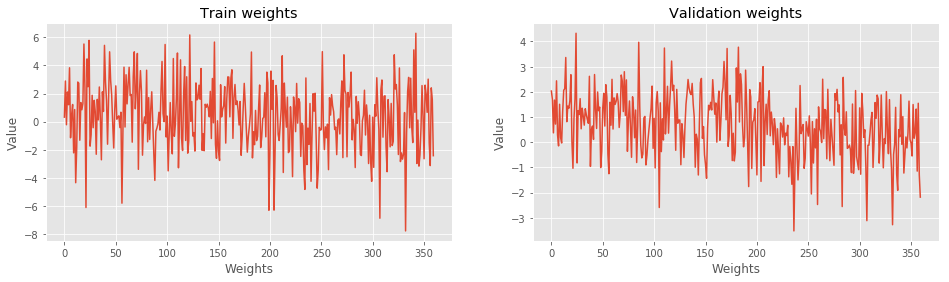

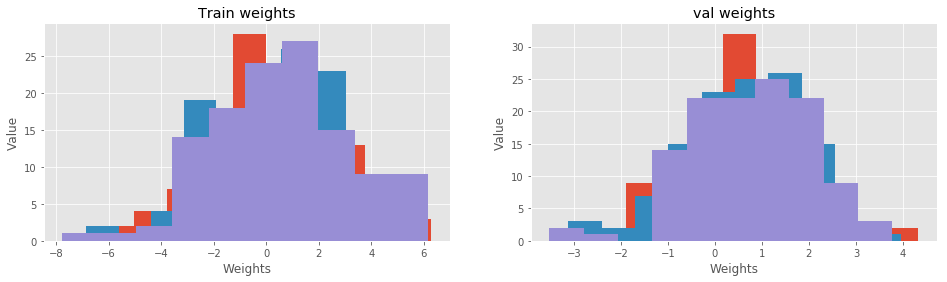

In [22]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

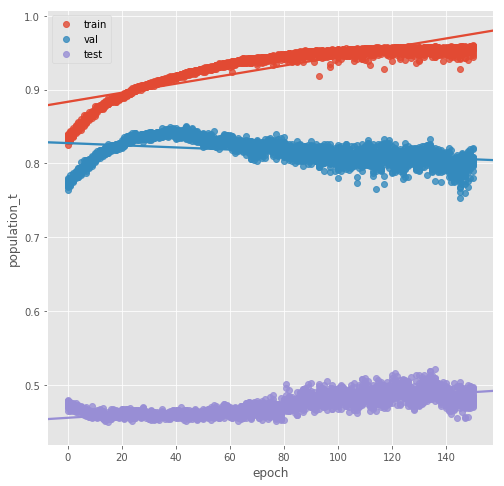

In [23]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

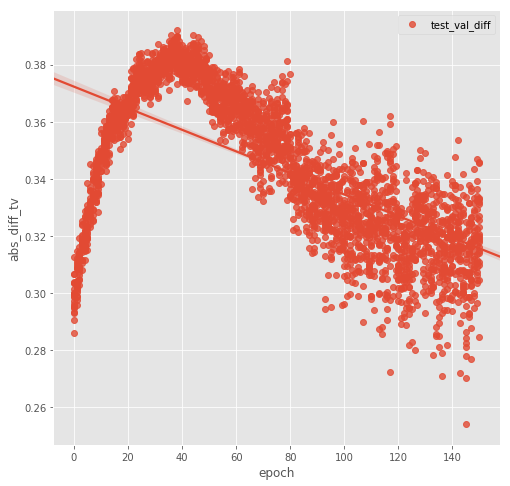

In [24]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

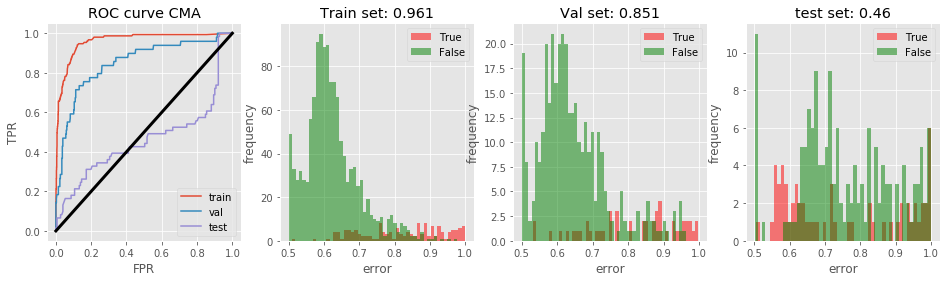

In [25]:
BO_vis.plot_cma(data)

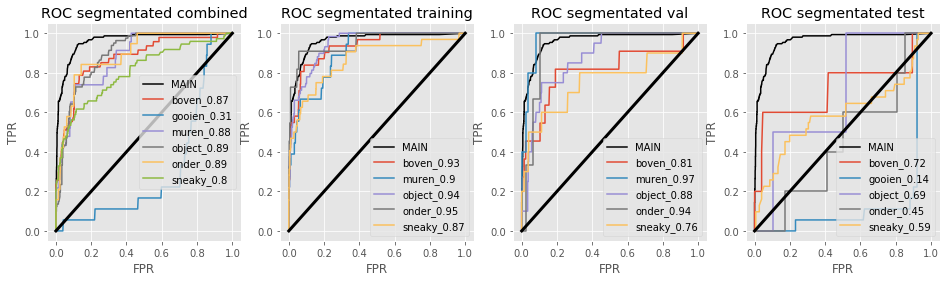

In [26]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

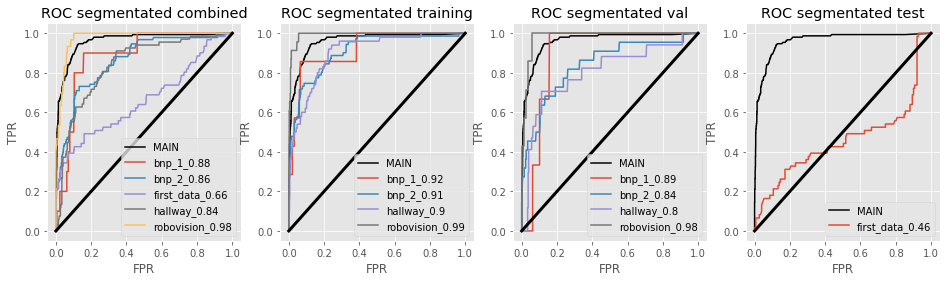

In [27]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [28]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=410074, Thu Jun  7 17:45:01 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -8.436717019971514e-01 1.0e+00 4.15e-01  4e-01  4e-01 1:06.3
    2     42 -8.462162246457421e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:15.7
    3     63 -8.496106542464159e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:24.0
    4     84 -8.530102820547475e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:32.0
    5    105 -8.581669040514830e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:41.2
    6    126 -8.587361077900340e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:49.3
    7    147 -8.602903718797759e-01 1.0e+00 3.85e-01  4e-01  4e-01 1:57.3
    8    168 -8.628608855666565e-01 1.0e+00 3.82e-01  4e-01  4e-01 2:06.4
    9    189 -8.647868215039455e-01 1.0e+00 3.78e-01  4e-01  4e-01 2:15.6
   10    210 -8.661773420524603e-01 1.0e+00 3.75e-01  4e-01  4e-01 2:24.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -8.698264

  100   2100 -9.047896285360807e-01 1.1e+00 3.58e-01  4e-01  4e-01 21:35.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.047636374977908e-01 1.2e+00 3.58e-01  4e-01  4e-01 22:16.6
  102   2142 -9.055511659579776e-01 1.2e+00 3.58e-01  4e-01  4e-01 22:22.5
  103   2163 -9.051015209955606e-01 1.2e+00 3.58e-01  4e-01  4e-01 22:27.9
  104   2184 -9.050287460883488e-01 1.2e+00 3.58e-01  4e-01  4e-01 22:33.2
  105   2205 -9.046180876833668e-01 1.2e+00 3.57e-01  4e-01  4e-01 22:39.1
  106   2226 -9.063750818717706e-01 1.2e+00 3.57e-01  4e-01  4e-01 22:45.2
  107   2247 -9.051171156185347e-01 1.2e+00 3.57e-01  4e-01  4e-01 22:50.5
  108   2268 -9.056291390728477e-01 1.2e+00 3.57e-01  4e-01  4e-01 22:55.5
  109   2289 -9.050651335419548e-01 1.2e+00 3.56e-01  4e-01  4e-01 23:01.0
  110   2310 -9.055589632694647e-01 1.2e+00 3.56e-01  4e-01  4e-01 23:06.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.054290080780147

In [29]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

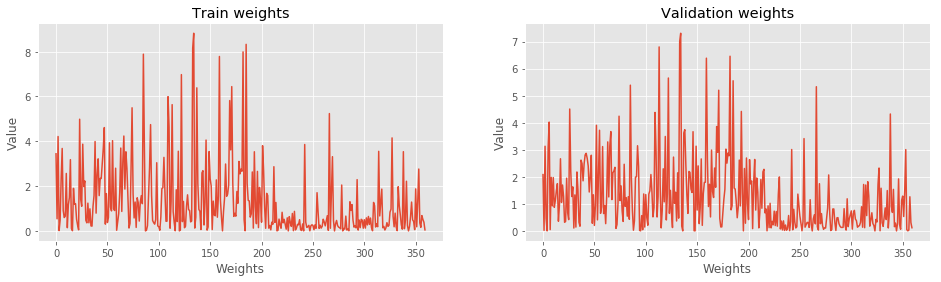

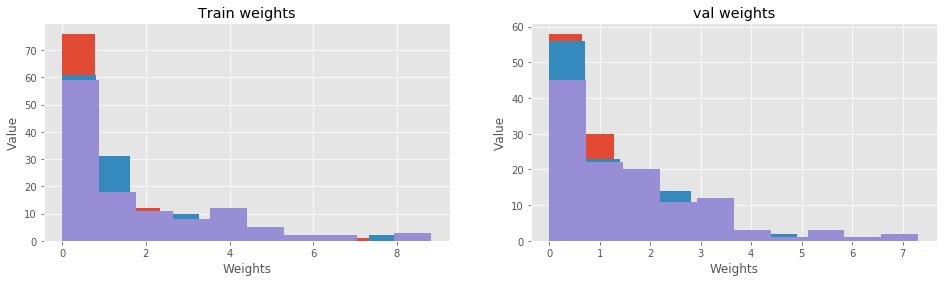

In [30]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

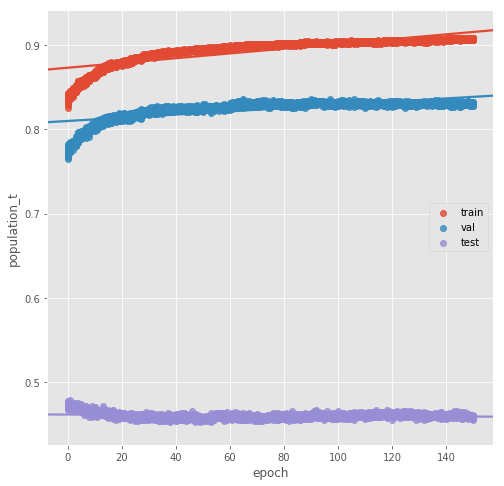

In [31]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

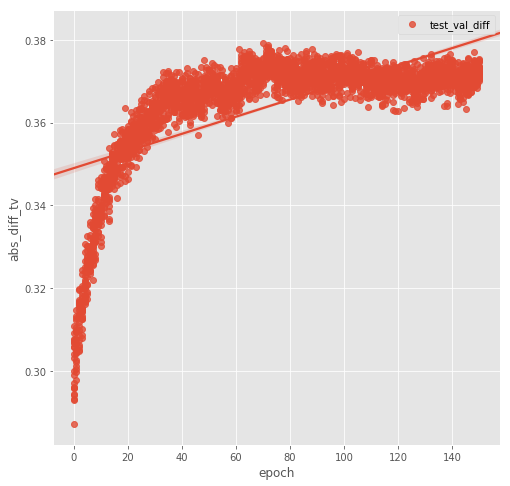

In [32]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

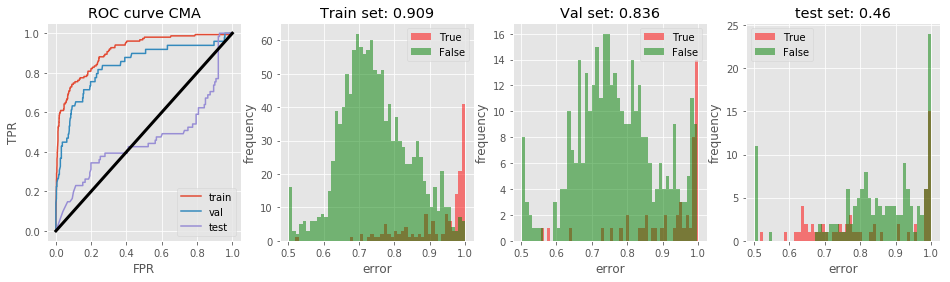

In [33]:
BO_vis.plot_cma(data)

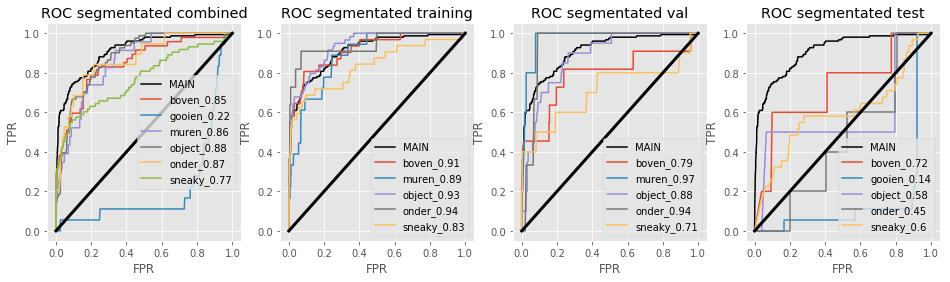

In [34]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

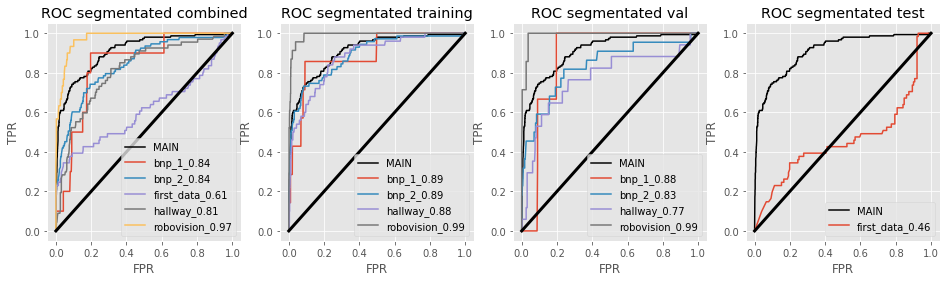

In [35]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus leaky relu

In [36]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=458776, Thu Jun  7 18:14:54 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -8.379848628192998e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:58.7
    2     42 -8.443812573424683e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:11.0
    3     63 -8.457119985029161e-01 1.0e+00 4.04e-01  4e-01  4e-01 1:22.7
    4     84 -8.546841049206234e-01 1.0e+00 3.99e-01  4e-01  4e-01 1:35.3
    5    105 -8.553702683314793e-01 1.0e+00 3.95e-01  4e-01  4e-01 1:46.2
    6    126 -8.582682691008140e-01 1.0e+00 3.91e-01  4e-01  4e-01 1:57.3
    7    147 -8.601240292347199e-01 1.0e+00 3.87e-01  4e-01  4e-01 2:06.9
    8    168 -8.633911027477726e-01 1.0e+00 3.84e-01  4e-01  4e-01 2:18.5
    9    189 -8.643475729568444e-01 1.0e+00 3.81e-01  4e-01  4e-01 2:28.8
   10    210 -8.665048291349142e-01 1.0e+00 3.78e-01  4e-01  4e-01 2:40.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -8.695145

  100   2100 -9.019020241820621e-01 1.2e+00 3.84e-01  4e-01  4e-01 30:50.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.025777911776020e-01 1.2e+00 3.84e-01  4e-01  4e-01 31:58.6
  102   2142 -9.028013141068960e-01 1.2e+00 3.85e-01  4e-01  4e-01 32:13.0
  103   2163 -9.027441338226578e-01 1.2e+00 3.85e-01  4e-01  4e-01 32:26.4
  104   2184 -9.022607005104640e-01 1.2e+00 3.86e-01  4e-01  4e-01 32:38.8
  105   2205 -9.024088494287170e-01 1.2e+00 3.86e-01  4e-01  4e-01 32:54.2
  106   2226 -9.023334754176759e-01 1.2e+00 3.86e-01  4e-01  4e-01 33:08.3
  107   2247 -9.018500421054820e-01 1.2e+00 3.87e-01  4e-01  4e-01 33:21.9
  108   2268 -9.022814933410960e-01 1.2e+00 3.87e-01  4e-01  4e-01 33:35.8
  109   2289 -9.024868225435870e-01 1.2e+00 3.87e-01  4e-01  4e-01 33:49.9
  110   2310 -9.038461538461539e-01 1.2e+00 3.87e-01  4e-01  4e-01 34:03.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.026141786312080

In [37]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

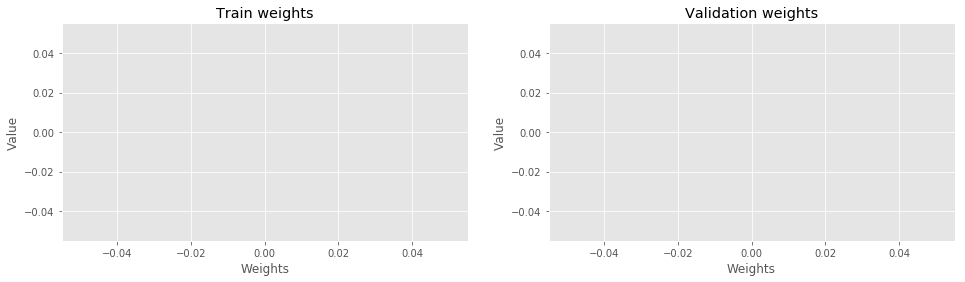

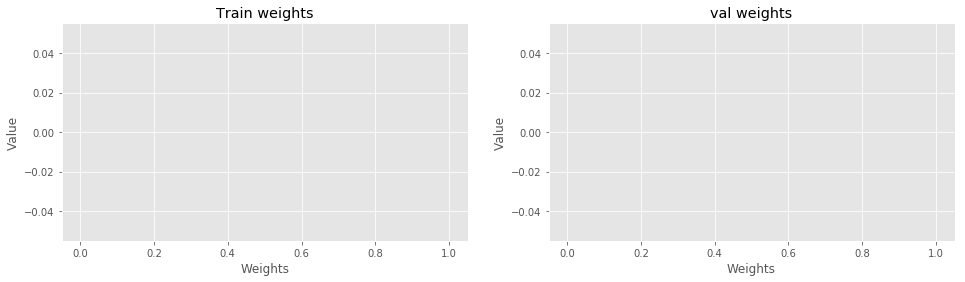

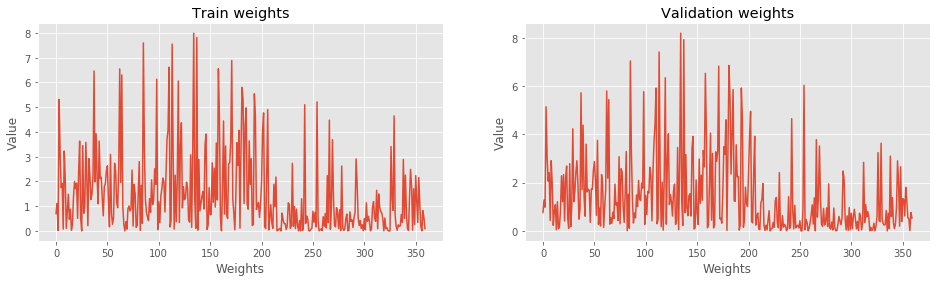

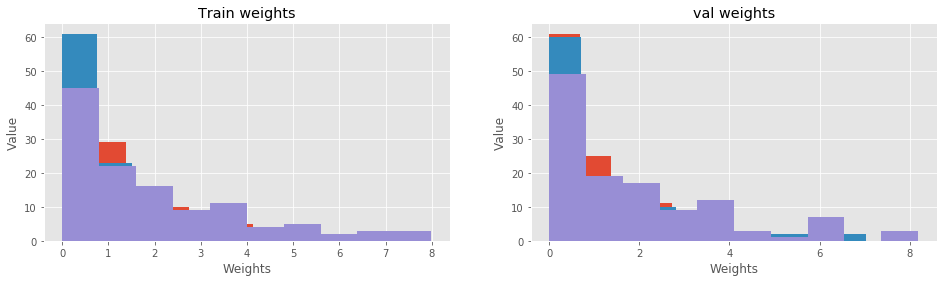

In [38]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

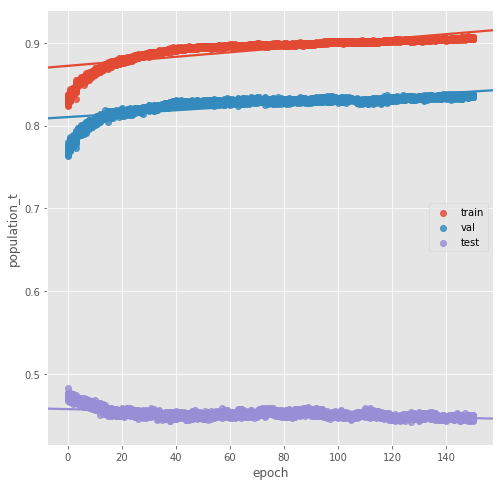

In [39]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

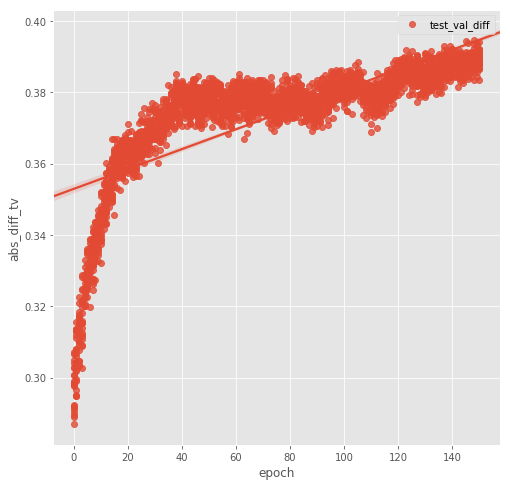

In [40]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

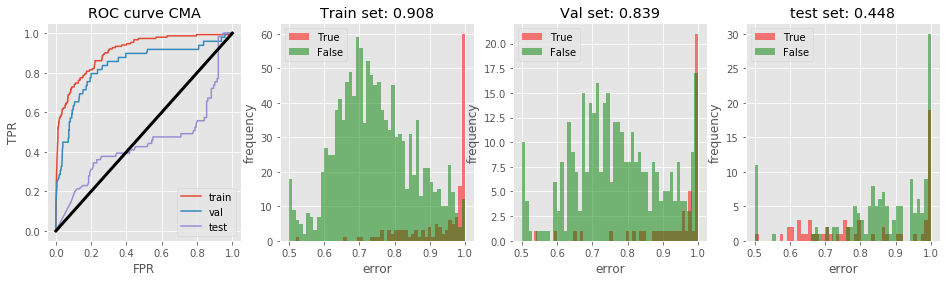

In [41]:
BO_vis.plot_cma(data)

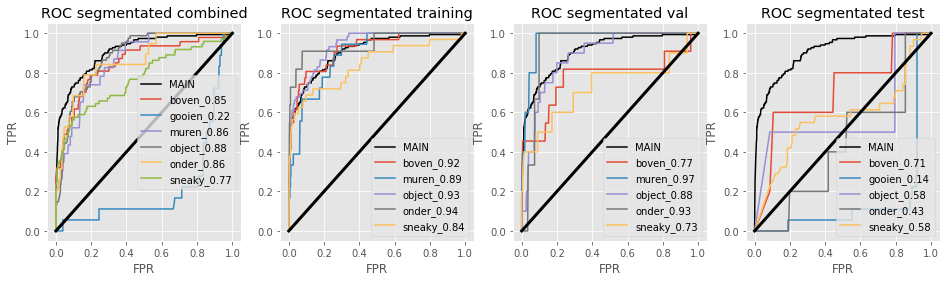

In [42]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

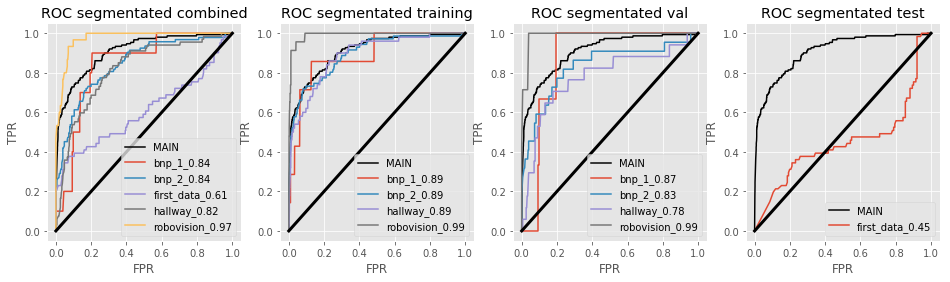

In [43]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [44]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=429535, Thu Jun  7 19:01:33 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -8.441317433748844e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:55.9
    2     42 -8.499823260939627e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:05.5
    3     63 -8.525034568080925e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:14.7
    4     84 -8.562279725950492e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:24.4
    5    105 -8.572936051649391e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:34.0
    6    126 -8.631779762337946e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:43.4
    7    147 -8.634586794473265e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:54.9
    8    168 -8.661123644567352e-01 1.0e+00 3.83e-01  4e-01  4e-01 2:06.7
    9    189 -8.693820370736169e-01 1.0e+00 3.80e-01  4e-01  4e-01 2:16.6
   10    210 -8.721708754821338e-01 1.0e+00 3.77e-01  4e-01  4e-01 2:28.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -8.739382

  100   2100 -9.527015085198622e-01 1.2e+00 4.66e-01  5e-01  5e-01 25:16.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.537853348165551e-01 1.2e+00 4.67e-01  5e-01  5e-01 26:09.0
  102   2142 -9.547963862060361e-01 1.2e+00 4.68e-01  5e-01  5e-01 26:19.4
  103   2163 -9.533850728268893e-01 1.2e+00 4.69e-01  5e-01  5e-01 26:30.5
  104   2184 -9.530835767827254e-01 1.2e+00 4.70e-01  5e-01  5e-01 26:42.0
  105   2205 -9.540582407186001e-01 1.2e+00 4.71e-01  5e-01  5e-01 26:52.3
  106   2226 -9.540556416147712e-01 1.2e+00 4.72e-01  5e-01  5e-01 27:03.2
  107   2247 -9.540790335492322e-01 1.2e+00 4.73e-01  5e-01  5e-01 27:13.9
  108   2268 -9.544455071891212e-01 1.2e+00 4.74e-01  5e-01  5e-01 27:24.5
  109   2289 -9.539204882156631e-01 1.2e+00 4.75e-01  5e-01  5e-01 27:35.6
  110   2310 -9.547548005447721e-01 1.2e+00 4.76e-01  5e-01  5e-01 27:46.2
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.543285475168161

In [45]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

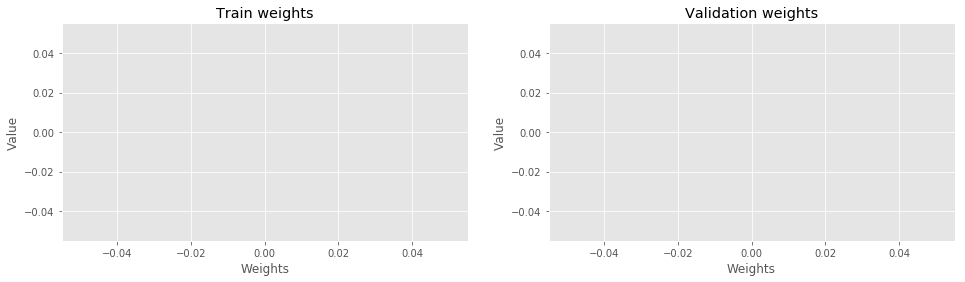

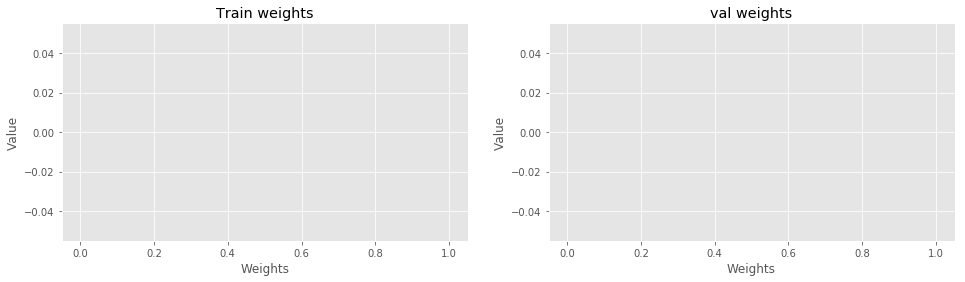

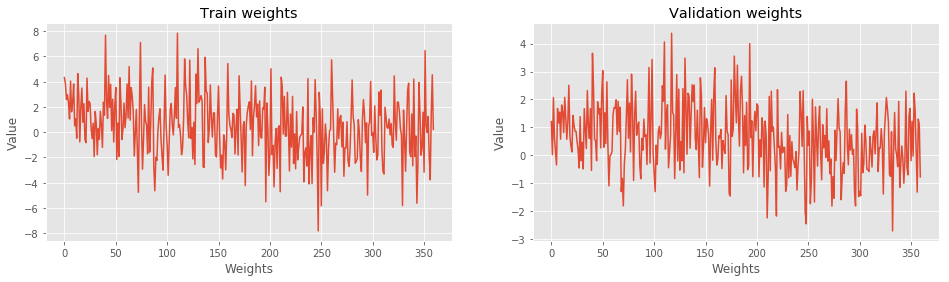

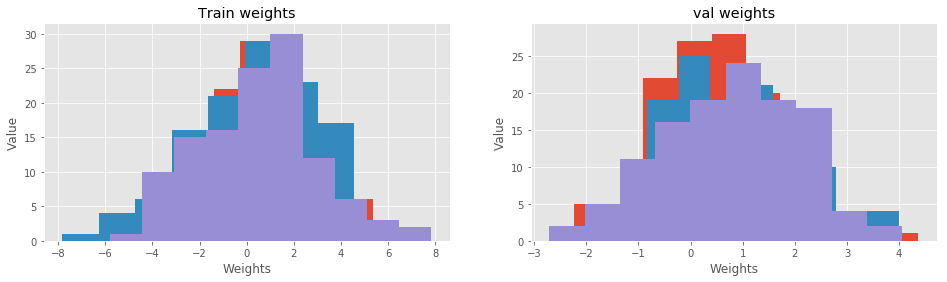

In [46]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

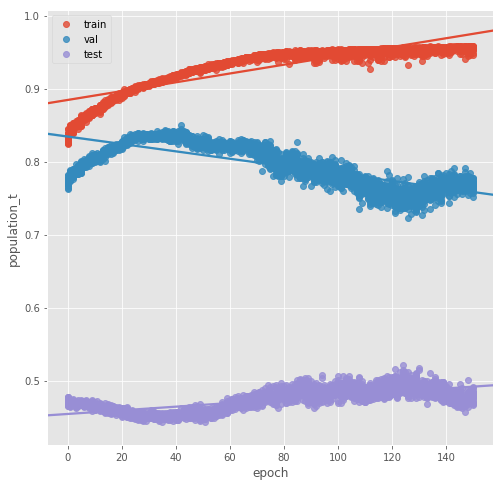

In [47]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

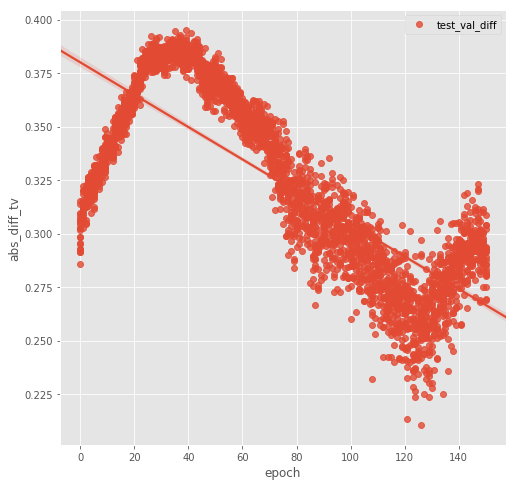

In [48]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

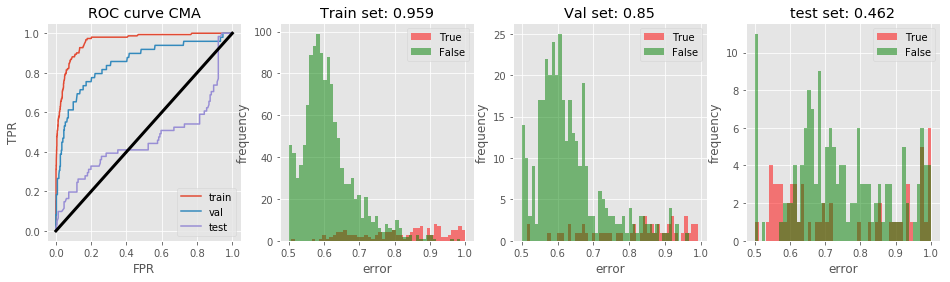

In [49]:
BO_vis.plot_cma(data)

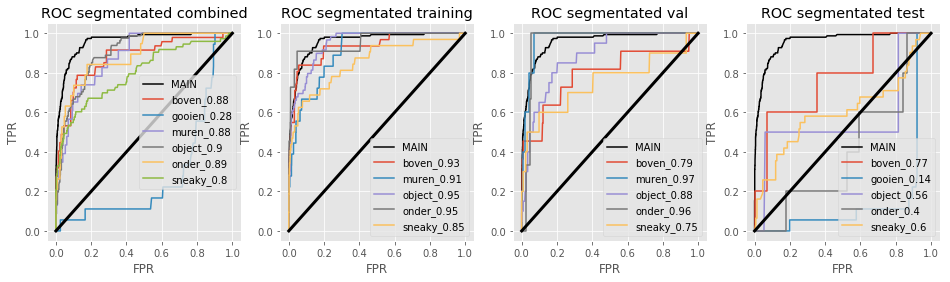

In [50]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

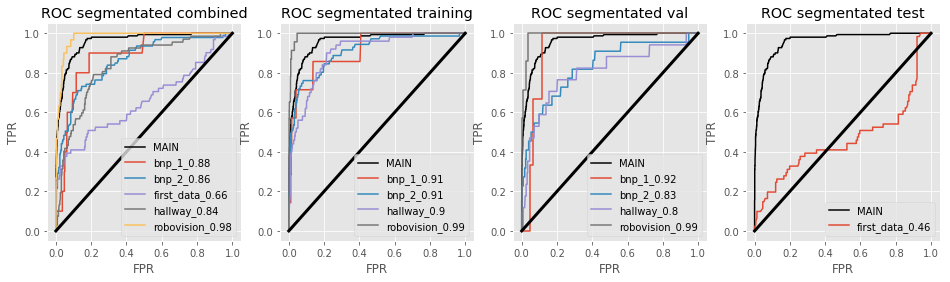

In [51]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

# DEEP2

In [52]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

NameError: name 'array_AUC_tr_a' is not defined

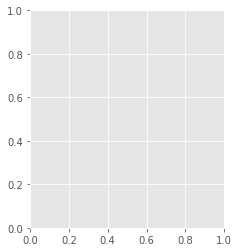

In [53]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'